# Sales Prediction for Big Mart Outlets

### By Archit Pandya

## Agenda
1. **[About the Dataset](#1)**
2. **[Objective](#2)**
3. **Loading Libraries**
4. **Loading Data**
5. **View Data**
6. **Separate Input Features and Output Features**
7. **Split The Data into Train and Test Set**
8. **Preprocess Data**
    <br>8.1. Typecast 'Object' Data type into 'Categorical' datatype
    <br>8.2. Impute Missing Values
    <br>8.3. Feature Engineering: Create new columns using 'Bins'
    <br>8.4. Clean Categories (Before Encoding)
    <br>8.5. Perform 'Ordinal Encoding'
    <br>8.6. Perform 'Frequency Encoding'
    <br>8.7. Perform 'Min Max Scaling
    <br>8.8. Save Dataframe
    <br>8.9. Define 'Baseline Model' Performance
9. **Build Keras 'Sequential' Neural Network Model**
    <br>9.1. Define Neural Network Architecture of the Model
    <br>9.2. Model Summary
    <br>9.3. Compile the Model (Loss Function and Optimizer)
    <br>9.4. Train the Model
    <br>9.5. 'Evaluate' Train and Valid Datasets
    <br>9.6. Visualize Model Performance (Train and Valid Datasets)
    <br>9.7. Plot the Distribution
    <br>9.8. Predict and Save Test Dataset
10. **Build Keras 'Functional' Neural Network Model**
    <br>10.1. Define Input, Output Neurons
    <br>10.2. Define the Architecture Using Functional API
    <br>10.3. Compile and Train the Model (Loss Function and Optimizer)
    <br>10.4. 'Evaluate' Train and Valid Datasets
    <br>10.5. Visualize Model Performance (Train and Valid Datasets)
    <br>10.6. Plot the Distribution
    <br>10.7. Predict and Save Test Dataset
11. **Build Keras Functional Neural Network Using 'KerasTuner'**
    <br>11.1. Define the Architecture Using Functional API
    <br>11.2. Instantiate 'RamdsonSearch' Tuner Object
    <br>11.3. Train the Model Using Hyperparameter Tuning Search
    <br>11.4. Get the 'Best Hyperparameters'
    <br>11.5. Build BestModel Using 'Hypermodel'
    <br>11.6. 'Evaluate' Train and Valid Datasets
    <br>11.7. Visualize Model Performance (Train and Valid Datasets)
    <br>11.8. Plot the Distribution
    <br>11.9. Predict and Save Test Dataset

## 1. About the BigMart Dataset<a id='1'></a>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Train file: CSV containing the item outlet information with sales value

**`Variable:`** Description
<br>
<br>**`Item_Identifier:`** Unique product ID
<br>**`Item_Weight:`** Weight of product
<br>**`Item_Fat_Content:`** Whether the product is low fat or not
<br>**`Item_Visibility:`** The % of total display area of all products in a store allocated to the particular product
<br>**`Item_Type:`** The category to which the product belongs
<br>**`Item_MRP:`** Maximum Retail Price (list price) of the product
<br>**`Outlet_Identifier:`** Unique store ID
<br>**`Outlet_Establishment_Year:`** The year in which store was established
<br>**`Outlet_Size:`** The size of the store in terms of ground area covered
<br>**`Outlet_Location_Type:`** The type of city in which the store is located
<br>**`Outlet_Type:`** Whether the outlet is just a grocery store or some sort of supermarket

**Target**
<br>**`Item_Outlet_Sales:`** Sales of the product in the particular store. This is the outcome variable to be predicted.


## 2. Objective<a id='2'></a>

The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

## 3. Loading the Libraries</a><a id='3'></a>

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processing and data frames. Matplotlib is used for data visualization. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, matplotlib.pyplot as plt).

**pyplot:** pyplot is matplotlib's plotting framework. It is the most used module of matplotlib.

In [1]:
# importing packages

import numpy  as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns

from scipy.stats import f_oneway
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('Imported Libraries')

Imported Libraries


## 4. Loading Data</a><a id='4'></a>

In [2]:
# The BM data file is assumed to be available in the same folder where folder of this notebook

bm_sales_train = pd.read_csv('train_XnW6LSF.csv')
bm_sales_test  = pd.read_csv('test_FewQE9B.csv')
bm_sales_pred  = pd.read_csv('test_FewQE9B.csv',usecols=['Item_Identifier','Outlet_Identifier'])

# Item Identifier does not have significant role to play in model design; hence, it can be dropped.
bm_sales_train = bm_sales_train.drop('Item_Identifier',axis=1)
bm_sales_test  = bm_sales_test.drop('Item_Identifier',axis=1)

## 5. View Data</a><a id='5'></a>

In [3]:
bm_sales_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bm_sales_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
bm_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [6]:
bm_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                4075 non-null   object 
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


## 6. Separate Input Features and Output Features</a><a id='6'></a>

Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we are trying to predict the price of a houce, so this is our target column i.e. 'MEDV'

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [7]:
# Function to separate input and output variables

def func_make_input_output(data,target,train_or_test):
    
    #Input variable / feature
    if train_or_test == 'train':
        x = data.drop(target, axis = 1)
        y = data[target]
        
        return x,y
    else:
        x = data
        return x

In [8]:
# Separate input and output variables

X_features_train,y_target_train = func_make_input_output(bm_sales_train,'Item_Outlet_Sales','train')
X_features_test                 = func_make_input_output(bm_sales_test, 'Item_Outlet_Sales','test')

X_features_train.shape,y_target_train.shape,X_features_test.shape

((8523, 10), (8523,), (5681, 10))

## 7. Split the data</a><a id='7'></a>

We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

We split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

In [9]:
# Function to split features into Train and Test datasets

def func_train_test_split(x_feature,y_target):
    
    # X_train: independent/input feature data for training the model
    # y_train: dependent/output feature data for training the model
    # X_test:  independent/input feature data for testing the model; will be used to predict the output values
    # y_test:  original dependent/output values of X_test; We will compare this values with our predicted values 
    #          to check the performance of our built model.

    # test_size = 0.20: 20% of the data will go for test set and 70% of the data will go for train set
    # random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

    # Assign variables to capture train test split output
    X_train, X_valid, y_train, y_valid = train_test_split(x_feature,y_target, test_size=0.2, random_state=42, shuffle=True)
    
    return X_train, X_valid, y_train, y_valid
    

In [10]:
# Split X and y features into Train and Valid Datasets

X_train, X_valid, y_train, y_valid = func_train_test_split(X_features_train,y_target_train)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((6818, 10), (6818,), (1705, 10), (1705,))

In [11]:
y_train_df = pd.DataFrame(y_train)
y_valid_df = pd.DataFrame(y_valid)
y_train_df.columns = ['Item_Outlet_Sales']
y_valid_df.columns = ['Item_Outlet_Sales']

## 8. Preprocess Data</a><a id='8'></a>

### 8.1 Typecast Feature datatype</a><a id='8.1'></a>

In [12]:
# Create feature list by data type

def func_list_obj_types(df,col_type):
    
    # List based on shared data type
    if col_type == 'object':
        list_dtypes = [col for col in df.columns if df[col].dtype == ('object')]
    else:
        # list_dtypes = df.select_dtypes(include=['int64','float64']).columns
        list_dtypes = [col for col in df.columns if df[col].dtype in ('int64','float64')]
        
    return list_dtypes

In [13]:
# Create Feature list

X_train_obj_types = func_list_obj_types(X_train,'object')
X_valid_obj_types = func_list_obj_types(X_valid,'object')
X_test_obj_types  = func_list_obj_types(X_features_test,'object')
#
X_train_num_types = func_list_obj_types(X_train,'int')
X_valid_num_types = func_list_obj_types(X_valid,'int')
X_test_num_types  = func_list_obj_types(X_features_test,'int')

In [14]:
# Typecast 'Object' datatype into 'Category' Datatype

def func_typecast_object_to_cat(dataset, list_of_cols_to_cat, datatype):
    
    #loop through the list to typecast each feature into 'Category'
    for col in list_of_cols_to_cat:
        dataset[col] = dataset[col].astype(datatype)
        
    return dataset

In [15]:
# Convert 'Object' datatypes iinto 'Category' of 'X_train'

X_train = func_typecast_object_to_cat(X_train,          X_train_obj_types, 'category')
X_valid = func_typecast_object_to_cat(X_valid,          X_valid_obj_types, 'category')
X_test  = func_typecast_object_to_cat(X_features_test,  X_test_obj_types,  'category')

In [16]:
X_train[X_train_obj_types].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Fat_Content      6818 non-null   category
 1   Item_Type             6818 non-null   category
 2   Outlet_Identifier     6818 non-null   category
 3   Outlet_Size           4883 non-null   category
 4   Outlet_Location_Type  6818 non-null   category
 5   Outlet_Type           6818 non-null   category
dtypes: category(6)
memory usage: 94.9 KB


In [17]:
X_train[X_train_num_types].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5644 non-null   float64
 1   Item_Visibility            6818 non-null   float64
 2   Item_MRP                   6818 non-null   float64
 3   Outlet_Establishment_Year  6818 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 266.3 KB


### 8.2 Impute Missing Values</a><a id='8.2'></a>

In [18]:
# Find missing numerical values for 'X_train'

X_train[X_train_num_types].isnull().sum()

Item_Weight                  1174
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [19]:
# Find missing categorical values for 'X_train'

X_train[X_train_obj_types].isnull().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1935
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [20]:
# Impute given numerical variable with mean value

def func_impute_missing_num_values_by_group(df, group_col, value_col):
    """Impute missing values in 'value_col' based 
    on the mean of each group in 'group_col'."""

    return df.groupby(group_col)[value_col].transform(lambda x: x.fillna(x.median()))

In [21]:
# Impute given categorical variable with mode value

def func_impute_missing_cat_values_by_group(df, group_col, value_col):
    """Impute missing values in 'value_col' based 
    on the mode of each group in 'group_col'."""
    
    return df.groupby(group_col)[value_col].transform(lambda x: x.fillna(x.mode()[0]))

In [22]:
# Impute missing values for 'Item_Weight'

X_train['Item_Weight']         = func_impute_missing_num_values_by_group(X_train, 'Item_Type', 'Item_Weight')
X_valid['Item_Weight']         = func_impute_missing_num_values_by_group(X_valid, 'Item_Type', 'Item_Weight')
X_features_test['Item_Weight'] = func_impute_missing_num_values_by_group(X_features_test, 'Item_Type', 'Item_Weight')

# Impute missing values for 'Outlet_Size'

X_train['Outlet_Size']         = func_impute_missing_cat_values_by_group(X_train, 'Outlet_Type', 'Outlet_Size')
X_valid['Outlet_Size']         = func_impute_missing_cat_values_by_group(X_valid, 'Outlet_Type', 'Outlet_Size')
X_features_test['Outlet_Size'] = func_impute_missing_cat_values_by_group(X_features_test, 'Outlet_Type', 'Outlet_Size')

In [23]:
X_train.isnull().sum().sum(),X_valid.isnull().sum().sum(),X_features_test.isnull().sum().sum()

(0, 0, 0)

### 8.3 Find Measure of Dispersion

In [24]:
# Defining Interquartile Range

def func_find_up_low_values(data, col):
    
    q1  = data[col].quantile(0.25)
    q3  = data[col].quantile(0.75)
    iqr = q3 - q1
    up  = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    
    return low, up

In [25]:
# Lets find which feature has any outliers ?

def func_find_outlier(data, col, up, low):
    outlier = data[(data[col] > up) | (data[col] < low)].any(axis='columns')
    
    return outlier

In [26]:
# Lets add functionalty

def func_outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [27]:
# Identify Outliers from the numberical columns and plot displaying with other statistical values

def func_identify_outliers(df, col_list):
    
    index = 0
    j = 0
    for col in col_list:
        index += 1
        j += 1
        print(col, '--> Min: ',np.round(df[col].min(),2),' Max: ', np.round(df[col].max(),2), 'Mean: ', 
              np.round(df[col].mean(),2), 'Median: ', np.round(df[col].median(),2), 
              'Std Dev: ', np.round(df[col].std(),2))
        
        low, high = func_outlier_thresholds(df, col)
        print(col, '--> low limit(Q1): ',np.round(low,2),' high limit(Q3): ',np.round(high,2),
             ' IQR : ', np.round((high - low),2))
        print(col, '--> Skewness: ',np.round(df[col].skew(),2))
        is_outlier = func_find_outlier(df, col, low, high)
        if is_outlier.any() == True:
             print(col,"--> has outliers\n")
        else:
             print(col, '--> has no outliers\n')
        j = 0

In [28]:
func_identify_outliers(X_train,X_train_num_types)

Item_Weight --> Min:  4.56  Max:  21.35 Mean:  12.84 Median:  12.85 Std Dev:  4.24
Item_Weight --> low limit(Q1):  -0.66  high limit(Q3):  26.16  IQR :  26.82
Item_Weight --> Skewness:  0.12
Item_Weight --> has outliers

Item_Visibility --> Min:  0.0  Max:  0.33 Mean:  0.07 Median:  0.05 Std Dev:  0.05
Item_Visibility --> low limit(Q1):  -0.07  high limit(Q3):  0.2  IQR :  0.27
Item_Visibility --> Skewness:  1.16
Item_Visibility --> has outliers

Item_MRP --> Min:  31.29  Max:  266.89 Mean:  141.91 Median:  144.26 Std Dev:  62.55
Item_MRP --> low limit(Q1):  -44.85  high limit(Q3):  325.88  IQR :  370.72
Item_MRP --> Skewness:  0.11
Item_MRP --> has outliers

Outlet_Establishment_Year --> Min:  1985  Max:  2009 Mean:  1997.86 Median:  1999.0 Std Dev:  8.4
Outlet_Establishment_Year --> low limit(Q1):  1961.5  high limit(Q3):  2029.5  IQR :  68.0
Outlet_Establishment_Year --> Skewness:  -0.4
Outlet_Establishment_Year --> has outliers



In [29]:
func_identify_outliers(y_train_df,y_train_df.columns)

Item_Outlet_Sales --> Min:  33.29  Max:  13086.96 Mean:  2202.37 Median:  1808.31 Std Dev:  1720.02
Item_Outlet_Sales --> low limit(Q1):  -2557.84  high limit(Q3):  6533.0  IQR :  9090.83
Item_Outlet_Sales --> Skewness:  1.18
Item_Outlet_Sales --> has outliers



### 8.4 Feature Engineering</a><a id='8.2'></a>

#### 8.4.1 Normalize Skewed Features and Target

In [30]:
# Apply log1p transformation using Numpy 

def func_transform_num_vars(df_train,df_valid,df_test,cols,y_tr,y_val):
    
    for col in cols:
        df_train[col+'_log']=np.log1p(df_train[[col]])
        df_valid[col+'_log']=np.log1p(df_valid[[col]])
        df_test[col+'_log'] =np.log1p(df_test[[col]])
    #------------------------------------------------------
    y_log_tr  = np.log1p(y_tr)
    y_log_val = np.log1p(y_val)
    
    return df_train,df_valid,df_test,pd.Series(y_log_tr),pd.Series(y_log_val)

In [31]:
X_train,X_valid,X_features_test,y_log_train,y_log_valid = \
    func_transform_num_vars(X_train,X_valid,X_features_test,X_train_num_types,y_train,y_valid)

In [32]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Outlet_Establishment_Year_log
549,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1,2.351375,0.034600,5.149497,7.600902
7757,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,Small,Tier 2,Supermarket Type1,2.944439,0.046381,5.144829,7.602401
764,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1,2.923162,0.073364,4.724909,7.599902
6867,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,Small,Tier 2,Supermarket Type1,2.232699,0.029409,3.752178,7.602401
2716,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1,2.628285,0.128594,5.053458,7.599902


In [33]:
# Check out Measure of Dispersions for the logged Features

X_train_log_types = ['Item_Weight_log','Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log']
func_identify_outliers(X_train,X_train_log_types)

Item_Weight_log --> Min:  1.71  Max:  3.11 Mean:  2.58 Median:  2.63 Std Dev:  0.33
Item_Weight_log --> low limit(Q1):  1.59  high limit(Q3):  3.59  IQR :  1.99
Item_Weight_log --> Skewness:  -0.44
Item_Weight_log --> has outliers

Item_Visibility_log --> Min:  0.0  Max:  0.28 Mean:  0.06 Median:  0.05 Std Dev:  0.05
Item_Visibility_log --> low limit(Q1):  -0.07  high limit(Q3):  0.19  IQR :  0.26
Item_Visibility_log --> Skewness:  1.0
Item_Visibility_log --> has outliers

Item_MRP_log --> Min:  3.47  Max:  5.59 Mean:  4.84 Median:  4.98 Std Dev:  0.52
Item_MRP_log --> low limit(Q1):  3.54  high limit(Q3):  6.26  IQR :  2.72
Item_MRP_log --> Skewness:  -0.74
Item_MRP_log --> has outliers

Outlet_Establishment_Year_log --> Min:  7.59  Max:  7.61 Mean:  7.6 Median:  7.6 Std Dev:  0.0
Outlet_Establishment_Year_log --> low limit(Q1):  7.58  high limit(Q3):  7.62  IQR :  0.03
Outlet_Establishment_Year_log --> Skewness:  -0.4
Outlet_Establishment_Year_log --> has outliers



In [34]:
y_log_train_df = pd.DataFrame(y_log_train)
y_log_valid_df = pd.DataFrame(y_log_valid)
y_log_train_df.columns = ['Item_Outlet_Sales']
y_log_valid_df.columns = ['Item_Outlet_Sales']
func_identify_outliers(y_log_train_df,y_log_valid_df.columns)

Item_Outlet_Sales --> Min:  3.53  Max:  9.48 Mean:  7.31 Median:  7.5 Std Dev:  1.01
Item_Outlet_Sales --> low limit(Q1):  4.8  high limit(Q3):  10.0  IQR :  5.2
Item_Outlet_Sales --> Skewness:  -0.89
Item_Outlet_Sales --> has outliers



In [35]:
y_log_train_df.head()

,Item_Outlet_Sales
549,7.777888
7757,8.040756
764,7.026606
6867,5.653529
2716,8.348893


#### 8.4.2 Create New Features</a><a id='8.3'></a>

Create new Categorical features for below Continuous features and achieve discrete categorical values:
- **Item_Weight:**                 '<=5', '>5-<=10', '>10-<=15', '>15-<=20', '>20'
- **Item_Visbility:**            '<=0.05', '>0.05-<=0.10', '<0.10-<=0.15','>0.15-<=0.20','>0.25'
- **Item_MRP:**                  '<=50', '>50-<=100', '>100-<=150', '>150-<=200','>200-<=250', '>250'

In [36]:
# Create new features indicating which Quartile each value belongs to

# def func_create_qrtl_features(df,cols):
#     #---------------------------------------------------------------------------------------------------
#     for col in cols:
#         # Calculate quartiles
#         #-----------------------------------------------------------------------------------------------
#         quartiles = df[col].quantile([0.25, 0.5, 0.75])
#         #-----------------------------------------------------------------------------------------------
#         # Create new columns based on quartiles
#         #-----------------------------------------------------------------------------------------------
#         df[col+'_QRTL1'] = df[col].apply(lambda x: 1 if x <= quartiles[0.25] else 0)
#         df[col+'_QRTL2'] = df[col].apply(lambda x: 1 if quartiles[0.25] < x <= quartiles[0.5] else 0)
#         df[col+'_QRTL3'] = df[col].apply(lambda x: 1 if quartiles[0.5] < x <= quartiles[0.75] else 0)
#         df[col+'_QRTL4'] = df[col].apply(lambda x: 1 if x > quartiles[0.75] else 0)
#         #-----------------------------------------------------------------------------------------------
#         # Convert data type to 'Category' for newly created group columns
#         #-----------------------------------------------------------------------------------------------
#         df[col+'_QRTL1'] = df[col+'_QRTL1'].astype('int64')
#         df[col+'_QRTL2'] = df[col+'_QRTL2'].astype('int64')
#         df[col+'_QRTL3'] = df[col+'_QRTL3'].astype('int64')
#         df[col+'_QRTL4'] = df[col+'_QRTL4'].astype('int64')
#     return df

In [37]:
# Create the new categorical column

# X_train_qrtl_types = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
# X_train            = func_create_qrtl_features(X_train,X_train_qrtl_types)
# X_valid            = func_create_qrtl_features(X_valid,X_train_qrtl_types)
# X_features_test    = func_create_qrtl_features(X_features_test,X_train_qrtl_types)

In [38]:
# func_identify_outliers(X_train,X_train_qrtl_types)

In [39]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Outlet_Establishment_Year_log
549,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1,2.351375,0.034600,5.149497,7.600902
7757,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,Small,Tier 2,Supermarket Type1,2.944439,0.046381,5.144829,7.602401
764,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1,2.923162,0.073364,4.724909,7.599902
6867,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,Small,Tier 2,Supermarket Type1,2.232699,0.029409,3.752178,7.602401
2716,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1,2.628285,0.128594,5.053458,7.599902


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Item_Weight                    6818 non-null   float64 
 1   Item_Fat_Content               6818 non-null   category
 2   Item_Visibility                6818 non-null   float64 
 3   Item_Type                      6818 non-null   category
 4   Item_MRP                       6818 non-null   float64 
 5   Outlet_Identifier              6818 non-null   category
 6   Outlet_Establishment_Year      6818 non-null   int64   
 7   Outlet_Size                    6818 non-null   category
 8   Outlet_Location_Type           6818 non-null   category
 9   Outlet_Type                    6818 non-null   category
 10  Item_Weight_log                6818 non-null   float64 
 11  Item_Visibility_log            6818 non-null   float64 
 12  Item_MRP_log                   6818 n

In [41]:
X_train.isnull().sum().sum(),X_valid.isnull().sum().sum(),X_features_test.isnull().sum().sum()

(0, 0, 0)

### 8.4 Clean Categories (Before Encoding)</a><a id='8.4'></a>

**Item_Fat_Content** (`Ordinal Encoding`)
- Make categorical values similar like 'Low Fat', 'low fat' and 'LF' --> 'LF'; 'Regular' and 'reg'--> 'REG'
- Encode 'LF'--> 0; 'REG'--> 1

In [42]:
X_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    4035
Regular    2336
LF          267
reg          93
low fat      87
Name: count, dtype: int64

**Outlet Size**(`Ordinal Encoding`)
- Encode 'Small':0;'Medium':1;'High':2

In [43]:
X_train['Outlet_Size'].value_counts()

Outlet_Size
Small     3841
Medium    2233
High       744
Name: count, dtype: int64

**Outlet_Location_Type**(`Ordinal Encoding`)
- Encode 'Tier 1':0;'Tier 2':1;'Tier 3':2

In [44]:
X_train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2703
Tier 2    2239
Tier 1    1876
Name: count, dtype: int64

**Function to clean categories for 'Item_Fat_Content'**

In [45]:
def func_clean_item_fat(df,col):

    # Dictionary to clean categories
    Item_Fat_Content_dict = {'Low Fat':'LF','LF':'LF','low fat':'LF','Regular':'REG','reg':'REG'}

    return df[col].map(Item_Fat_Content_dict)

In [46]:
X_train['Item_Fat_Content'] = func_clean_item_fat(X_train,'Item_Fat_Content')
X_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     4389
REG    2429
Name: count, dtype: int64

In [47]:
X_valid['Item_Fat_Content'] = func_clean_item_fat(X_valid,'Item_Fat_Content')
X_valid['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     1128
REG     577
Name: count, dtype: int64

In [48]:
X_features_test['Item_Fat_Content'] = func_clean_item_fat(X_features_test,'Item_Fat_Content')
X_features_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     3668
REG    2013
Name: count, dtype: int64

### 8.5 Perform 'Ordinal Encoding'</a><a id='8.5'></a> 

In [49]:
# Function to encode using Ordinal Encoding

def func_Ordinal_Encoding(df):
    Item_Fat_Content_mapping     = {'LF':0,'REG':1}
    Outlet_Size_mapping          = {'Small':0,'Medium':1,'High':2}
    Outlet_Location_Type_mapping = {'Tier 1':0,'Tier 2':1,'Tier 3':2}
    #-------------------------------------------------------------------------------------------
    df['Item_Fat_Content']       = df['Item_Fat_Content'].map(Item_Fat_Content_mapping)
    df['Outlet_Size']            = df['Outlet_Size'].map(Outlet_Size_mapping)
    df['Outlet_Location_Type']   = df['Outlet_Location_Type'].map(Outlet_Location_Type_mapping)
    #-------------------------------------------------------------------------------------------
    df['Item_Fat_Content']       = df['Item_Fat_Content'].astype('float64')
    df['Outlet_Size']            = df['Outlet_Size'].astype('float64')
    df['Outlet_Location_Type']   = df['Outlet_Location_Type'].astype('float64')
    #-------------------------------------------------------------------------------------------
    return df

In [50]:
X_train         = func_Ordinal_Encoding(X_train)
X_valid         = func_Ordinal_Encoding(X_valid)
X_features_test = func_Ordinal_Encoding(X_features_test)

### 8.6 Perform 'Frequency Encoding'</a><a id='8.6'></a> 

**Item_Type**(`Frequency Encoding`)
<br>- Encode 'Item Types' category values with its frequency count
<br>**Outlet_Identifier**(`Frequency Encoding`)
<br>- Encode 'Outlet Identifier' category values with its frequency count
<br>**Outlet_Type**(`Frequency Encoding`)
<br>- Encode 'Outlet Type' category values with its frequency count

In [51]:
# Function to encode using Frequency Encoding

def func_frequency_encoding(df):
    """
    Encodes a categorical variable using frequency encoding.

    """
    #------------------------------------------------------------------------------------------------
    # Calculate frequency of each category
    #------------------------------------------------------------------------------------------------
    Item_Type_map                 = df['Item_Type'].value_counts(normalize=True).to_dict()
    Outlet_Identifier_map         = df['Outlet_Identifier'].value_counts(normalize=True).to_dict()
    Outlet_Type_map               = df['Outlet_Type'].value_counts(normalize=True).to_dict()
    #------------------------------------------------------------------------------------------------
    # Replace categories with their frequencies
    #------------------------------------------------------------------------------------------------
    df['Item_Type']              = df['Item_Type'].map(Item_Type_map)
    df['Outlet_Identifier']      = df['Outlet_Identifier'].map(Outlet_Identifier_map)
    df['Outlet_Type']            = df['Outlet_Type'].map(Outlet_Type_map)
    #------------------------------------------------------------------------------------------------
    df['Item_Type']              = df['Item_Type'].astype('float64')
    df['Outlet_Identifier']      = df['Outlet_Identifier'].astype('float64')
    df['Outlet_Type']            = df['Outlet_Type'].astype('float64')

    return df

In [52]:
# Perform 'Frequency Encoding' to the Numerical columns

X_train = func_frequency_encoding(X_train)
X_valid = func_frequency_encoding(X_valid)
X_features_test = func_frequency_encoding(X_features_test)
#----------------------------------------------------------
X_train.reset_index(drop=True,inplace=True)
X_valid.reset_index(drop=True,inplace=True)
X_features_test.reset_index(drop=True,inplace=True)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    6818 non-null   float64
 1   Item_Fat_Content               6818 non-null   float64
 2   Item_Visibility                6818 non-null   float64
 3   Item_Type                      6818 non-null   float64
 4   Item_MRP                       6818 non-null   float64
 5   Outlet_Identifier              6818 non-null   float64
 6   Outlet_Establishment_Year      6818 non-null   int64  
 7   Outlet_Size                    6818 non-null   float64
 8   Outlet_Location_Type           6818 non-null   float64
 9   Outlet_Type                    6818 non-null   float64
 10  Item_Weight_log                6818 non-null   float64
 11  Item_Visibility_log            6818 non-null   float64
 12  Item_MRP_log                   6818 non-null   f

In [54]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Outlet_Establishment_Year_log
0,9.500,1.0,0.035206,0.146964,171.3448,0.105603,1999,1.0,0.0,0.652097,2.351375,0.034600,5.149497,7.600902
1,18.000,0.0,0.047473,0.109123,170.5422,0.107950,2002,0.0,1.0,0.652097,2.944439,0.046381,5.144829,7.602401
2,17.600,1.0,0.076122,0.047668,111.7202,0.108976,1997,0.0,0.0,0.652097,2.923162,0.073364,4.724909,7.599902
3,8.325,0.0,0.029845,0.146964,41.6138,0.107950,2002,0.0,1.0,0.652097,2.232699,0.029409,3.752178,7.602401
4,12.850,0.0,0.137228,0.142417,155.5630,0.108976,1997,0.0,0.0,0.652097,2.628285,0.128594,5.053458,7.599902


### 8.7 Perform 'Min Max Scaling'</a><a id='8.7'></a> 

In [55]:
# Funtion to scale columns to prepare datasets ready for next modeling steps

def func_scale_cols(df_train,df_valid,df_test):
    
    from sklearn.preprocessing import MinMaxScaler
    #--------------------------------------------
    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()
    #--------------------------------------------------------------------------------------------
    # Fit and transform the scaler on the numeric columns
    df_train[['Item_Weight',     'Item_Visibility',    'Item_MRP',    'Outlet_Establishment_Year',\
              'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log','Outlet_Establishment_Year']] = \
        scaler.fit_transform(df_train[[
            'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log',\
            'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log','Outlet_Establishment_Year']])
    #--------------------------------------------------------------------------------------------
    df_valid[['Item_Weight',     'Item_Visibility',    'Item_MRP',    'Outlet_Establishment_Year',\
              'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log','Outlet_Establishment_Year']] = \
        scaler.transform(df_valid[[
            'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log',\
            'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log','Outlet_Establishment_Year']])
    #--------------------------------------------------------------------------------------------
    df_test[['Item_Weight',     'Item_Visibility',    'Item_MRP',    'Outlet_Establishment_Year',\
              'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log','Outlet_Establishment_Year']] = \
        scaler.transform(df_test[[
            'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log',\
            'Item_Weight_log', 'Item_Visibility_log','Item_MRP_log','Outlet_Establishment_Year_log','Outlet_Establishment_Year']])

    return df_train,df_valid,df_test

In [56]:
X_scaled_train,X_scaled_valid,X_scaled_test = func_scale_cols(X_train,X_valid,X_features_test)

In [57]:
X_scaled_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Outlet_Establishment_Year_log
0,0.457341,1.0,0.121846,0.146964,0.791535,0.105603,0.583333,1.0,0.0,0.652097,0.457341,0.121846,0.791535,0.584792
1,0.883353,0.0,0.163331,0.109123,0.789329,0.107950,0.708333,0.0,1.0,0.652097,0.883353,0.163331,0.789329,0.709572
2,0.868069,1.0,0.258352,0.047668,0.590861,0.108976,0.500000,0.0,0.0,0.652097,0.868069,0.258352,0.590861,0.501502
3,0.372093,0.0,0.103563,0.146964,0.131118,0.107950,0.708333,0.0,1.0,0.652097,0.372093,0.103563,0.131118,0.709572
4,0.656252,0.0,0.452845,0.142417,0.746144,0.108976,0.500000,0.0,0.0,0.652097,0.656252,0.452845,0.746144,0.501502


In [58]:
X_scaled_valid.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Outlet_Establishment_Year_log
0,0.727774,0.0,0.091418,0.102639,0.431339,0.110264,0.083333,2.0,2.0,0.663343,0.727774,0.091418,0.431339,0.083794
1,0.341002,0.0,0.241998,0.065103,0.143107,0.109677,0.500000,0.0,0.0,0.663343,0.341002,0.241998,0.143107,0.501502
2,0.737103,1.0,0.142560,0.079765,0.135881,0.123167,0.583333,1.0,0.0,0.663343,0.737103,0.142560,0.135881,0.584792
3,0.645804,1.0,0.154221,0.053372,0.797964,0.102053,0.000000,1.0,2.0,0.102053,0.645804,0.154221,0.797964,0.000000
4,0.503380,1.0,0.043592,0.058651,0.858340,0.105572,0.791667,0.0,1.0,0.663343,0.503380,0.043592,0.858340,0.792655


In [59]:
X_scaled_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Outlet_Establishment_Year_log
0,0.980453,0.0,0.026539,0.138884,0.574401,0.109136,0.583333,1.0,0.0,0.654286,0.980453,0.026539,0.574401,0.584792
1,0.370164,1.0,0.132788,0.079916,0.475565,0.108608,0.916667,0.0,1.0,0.654286,0.370164,0.132788,0.475565,0.917124
2,0.741722,0.0,0.334275,0.019539,0.953435,0.065129,0.541667,0.0,2.0,0.127090,0.741722,0.334275,0.953435,0.543157
3,0.289745,0.0,0.053778,0.138884,0.744544,0.108608,0.916667,0.0,1.0,0.654286,0.289745,0.053778,0.744544,0.917124
4,0.653654,1.0,0.394682,0.079916,0.938555,0.109840,0.000000,1.0,2.0,0.109840,0.653654,0.394682,0.938555,0.000000


### 8.8 Save Dataframe</a><a id='8.8'></a> 

In [60]:
# Save the current state of DataFrame to Excel and pickle file

X_train.to_excel('X_train.xlsx',index=False)
X_valid.to_excel('X_valid.xlsx',index=False)
X_features_test.to_excel('X_features_test.xlsx',index=False)
#---------------------------------------------------------------
X_scaled_train.to_excel('X_scaled_train.xlsx',index=False)
X_scaled_valid.to_excel('X_scaled_valid.xlsx',index=False)
X_scaled_test.to_excel('X_scaled_features_test.xlsx',index=False)
#---------------------------------------------------------------
X_train.to_pickle('X_train.pkl')
X_valid.to_pickle('X_valid.pkl')
X_features_test.to_pickle('X_features_test.pkl')
#---------------------------------------------------------------
X_scaled_train.to_pickle('X_scaled_train.pkl')
X_scaled_valid.to_pickle('X_scaled_valid.pkl')
X_scaled_test.to_pickle('X_scaled_features_test.pkl')

***Drop below columns as respective log columns exist**

In [61]:
# Drop below features and check out the shape of the datasets

X_scaled_train = X_scaled_train.drop(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1)
X_scaled_valid = X_scaled_valid.drop(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1)
X_scaled_test  = X_scaled_test.drop(['Item_Weight' , 'Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1)


X_train          = X_train.drop(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1)
X_valid          = X_valid.drop(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1)
X_features_test  = X_features_test.drop(['Item_Weight' , 'Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1)

In [62]:
(X_train.shape,X_scaled_train.shape,y_train.shape),(X_valid.shape,X_scaled_valid.shape,y_valid.shape),(X_scaled_test.shape)

(((6818, 10), (6818, 10), (6818,)),
 ((1705, 10), (1705, 10), (1705,)),
 (5681, 10))

### 8.9 Define 'Baseline Model' Performance<a id='8.9'></a> 

**Compute Average Sales (Train and Valid Datasets)**

In [63]:
#calculate the average score of the train dataset

mean_sales_train = y_train.mean()
print("Average Sales(Train):",mean_sales_train)
mean_sales_valid = y_valid.mean()
print("Average Sales(Valid):",mean_sales_valid)
#---------------------------------------------------------
mean_sales_log_train = y_log_train.mean()
print("\nLog Average Sales(Train):",mean_sales_log_train)
mean_sales_log_valid = y_log_valid.mean()
print("Log Average Sales(Valid):",mean_sales_log_valid)


Average Sales(Train): 2202.365231211499
Average Sales(Valid): 2097.0083659824045

Log Average Sales(Train): 7.309469162159492
Log Average Sales(Valid): 7.251453565725218


**Compute MAE Sales (Train and Valid Datasets)**

In [64]:
#Calculate the Mean Absolute Error on the test dataset

print("MAE(Train):",abs(np.subtract(y_train, mean_sales_train)).mean())
print("MAE(Valid):",abs(np.subtract(y_valid, mean_sales_valid)).mean())
#
print("\nMAE(Log Train):",abs(np.subtract(y_log_train, mean_sales_log_train)).mean())
print("MAE(Log Valid):",abs(np.subtract(y_log_valid, mean_sales_log_valid)).mean())

MAE(Train): 1357.4626666789145
MAE(Valid): 1301.9849003947331

MAE(Log Train): 0.7989731006841285
MAE(Log Valid): 0.8135673021335594


In [65]:
X_scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Fat_Content               6818 non-null   float64
 1   Item_Type                      6818 non-null   float64
 2   Outlet_Identifier              6818 non-null   float64
 3   Outlet_Size                    6818 non-null   float64
 4   Outlet_Location_Type           6818 non-null   float64
 5   Outlet_Type                    6818 non-null   float64
 6   Item_Weight_log                6818 non-null   float64
 7   Item_Visibility_log            6818 non-null   float64
 8   Item_MRP_log                   6818 non-null   float64
 9   Outlet_Establishment_Year_log  6818 non-null   float64
dtypes: float64(10)
memory usage: 532.8 KB


## 9. Build Keras 'Sequential' Neural Network Model<a id='9'></a> 

### 9.1. Define Neural Network Architecture of the Model<a id='9.2'></a> 

### 9.1.1 Import NN Libraries

In [66]:
import keras
from   keras             import layers, initializers, regularizers
from   keras.layers      import InputLayer, Dense, Dropout, BatchNormalization
from   keras.constraints import max_norm
from   keras.models      import Sequential

import pickle

### 9.1.3 Define Input and Output Neurons

In [67]:
input_neurons = X_scaled_train.shape[1];num_of_layers=5;Lrate0=0.001;Lrate1=0.0005;Lrate2=0.01;Lrate3=0.025;activation_fn='relu';optimizer='adam'
neuron_sl1=[50,50,50,50,50];  neuron_sl2=[50,50,50,50,50];  neuron_sl3=[50,50,50,50,50];  neuron_sl4=[50,50,50,50,50];
neuron_sl5=[200,100,50,50,50];neuron_sl6=[200,100,50,50,50];neuron_sl7=[200,100,50,50,50];neuron_sl8=[200,100,50,50,50];
neuron_sl9=[200,100,50,50,50];neuron_sl10=[200,100,50,50,50]

### 9.1.3 Define Sequential Model

In [68]:
# Create Regression Model using Input parameters

def func_create_regression_model(input_shape,hidden_neurons,num_layers=5,activation='relu',weights='he_normal',\
                                     drop='Y',bn='Y',optimizer='adam',learning_rate=0.001):
    #---------------------------------------------------------------------------------------------------------
    model = keras.Sequential()
    #---------------------------------------------------------------------------------------------------------
    model.add(layers.Input(shape=input_shape))
    #---------------------------------------------------------------------------------------------------------
    # Add hidden layers with 'L2 regularizer'
    #---------------------------------------------------------------------------------------------------------
    for layer in range(num_layers): 
        model.add(layers.Dense(hidden_neurons[layer],kernel_initializer=weights,activation=activation))
        if drop=='Y':    
            model.add(Dropout(0.2))
        if bn=='Y':
            model.add(BatchNormalization())
    #---------------------------------------------------------------------------------------------------------
    # Output layer - # Regression output has a single neuron
    #---------------------------------------------------------------------------------------------------------
    model.add(layers.Dense(1))
    #---------------------------------------------------------------------------------------------------------
    # Instantiate Optimizer with input Learning Rate
    #---------------------------------------------------------------------------------------------------------
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    #---------------------------------------------------------------------------------------------------------
    model.compile(loss='mean_absolute_error',optimizer=optimizer,metrics=['r2_score','mean_squared_error'])
    #---------------------------------------------------------------------------------------------------------
    return model

**Model Parameters**
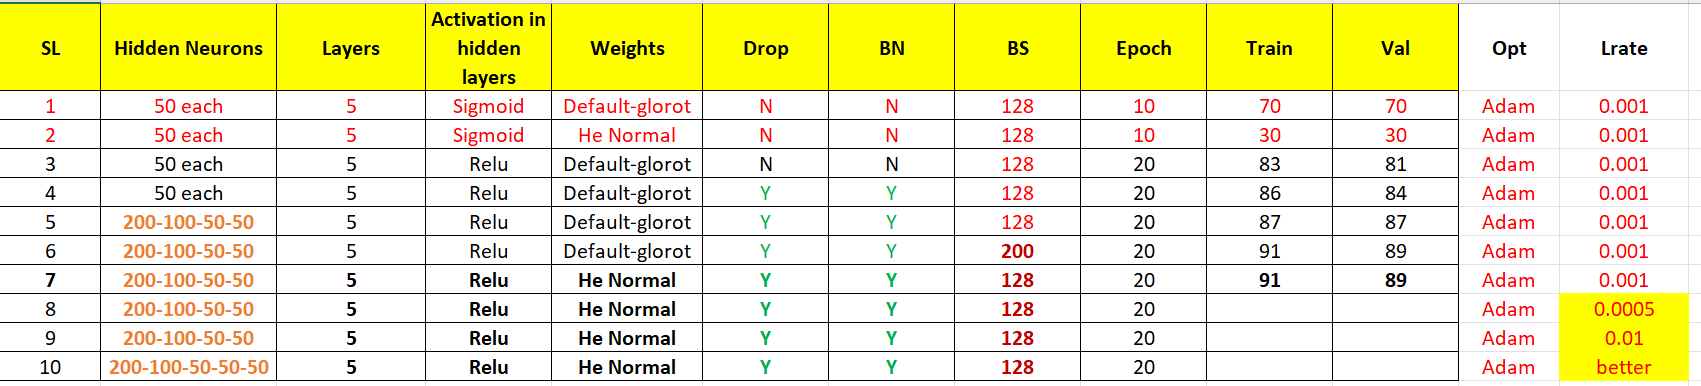

In [69]:
# Create Sequential NN Models per given parameters
#-------------------------------------------------------------------------------------------------------------------------------------------
# Models using 'Adam' Optimizer
#-------------------------------------------------------------------------------------------------------------------------------------------s
input_shape     = (input_neurons,)  
model_ADM1      = func_create_regression_model(input_shape,neuron_sl1, num_of_layers,activation_fn,'GlorotNormal' ,'N','N',optimizer,Lrate0)
model_ADM2      = func_create_regression_model(input_shape,neuron_sl2, num_of_layers,activation_fn,'he_normal'    ,'N','N',optimizer,Lrate0)
model_ADM3      = func_create_regression_model(input_shape,neuron_sl3, num_of_layers,activation_fn,'GlorotNormal' ,'N','N',optimizer,Lrate0)
model_ADM4      = func_create_regression_model(input_shape,neuron_sl4, num_of_layers,activation_fn,'GlorotNormal' ,'Y','Y',optimizer,Lrate0)
model_ADM5      = func_create_regression_model(input_shape,neuron_sl5, num_of_layers,activation_fn,'GlorotNormal' ,'Y','Y',optimizer,Lrate0)
model_ADM6      = func_create_regression_model(input_shape,neuron_sl6, num_of_layers,activation_fn,'GlorotNormal' ,'Y','Y',optimizer,Lrate0)
model_ADM7      = func_create_regression_model(input_shape,neuron_sl7, num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate0)
model_ADM8      = func_create_regression_model(input_shape,neuron_sl8, num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate1)
model_ADM9      = func_create_regression_model(input_shape,neuron_sl9, num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate2)
model_ADM10      = func_create_regression_model(input_shape,neuron_sl10,num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate3)
all_adm_models  = [model_ADM1,model_ADM2,model_ADM3,model_ADM4,model_ADM5,model_ADM6,model_ADM7,model_ADM8,model_ADM9,model_ADM10]

In [70]:
#-------------------------------------------------------------------------------------------------------------------------------------------
# Models using 'SGD' Optimizer
#-------------------------------------------------------------------------------------------------------------------------------------------s
input_shape     = (input_neurons,)  
model_SGD1      = func_create_regression_model(input_shape,neuron_sl1, num_of_layers,activation_fn,'GlorotNormal' ,'N','N',optimizer,Lrate0)
model_SGD2      = func_create_regression_model(input_shape,neuron_sl2, num_of_layers,activation_fn,'he_normal'    ,'N','N',optimizer,Lrate0)
model_SGD3      = func_create_regression_model(input_shape,neuron_sl3, num_of_layers,activation_fn,'GlorotNormal' ,'N','N',optimizer,Lrate0)
model_SGD4      = func_create_regression_model(input_shape,neuron_sl4, num_of_layers,activation_fn,'GlorotNormal' ,'Y','Y',optimizer,Lrate0)
model_SGD5      = func_create_regression_model(input_shape,neuron_sl5, num_of_layers,activation_fn,'GlorotNormal' ,'Y','Y',optimizer,Lrate0)
model_SGD6      = func_create_regression_model(input_shape,neuron_sl6, num_of_layers,activation_fn,'GlorotNormal' ,'Y','Y',optimizer,Lrate0)
model_SGD7      = func_create_regression_model(input_shape,neuron_sl7, num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate0)
model_SGD8      = func_create_regression_model(input_shape,neuron_sl8, num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate1)
model_SGD9      = func_create_regression_model(input_shape,neuron_sl9, num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate2)
model_SGD10      = func_create_regression_model(input_shape,neuron_sl10,num_of_layers,activation_fn,'he_normal'    ,'Y','Y',optimizer,Lrate3)
all_sgd_models  = [model_SGD1,model_SGD2,model_SGD3,model_SGD4,model_SGD5,model_SGD6,model_SGD7,model_SGD8,model_SGD9,model_SGD10]

### 9.2 Model Summary

**Model Parameters**
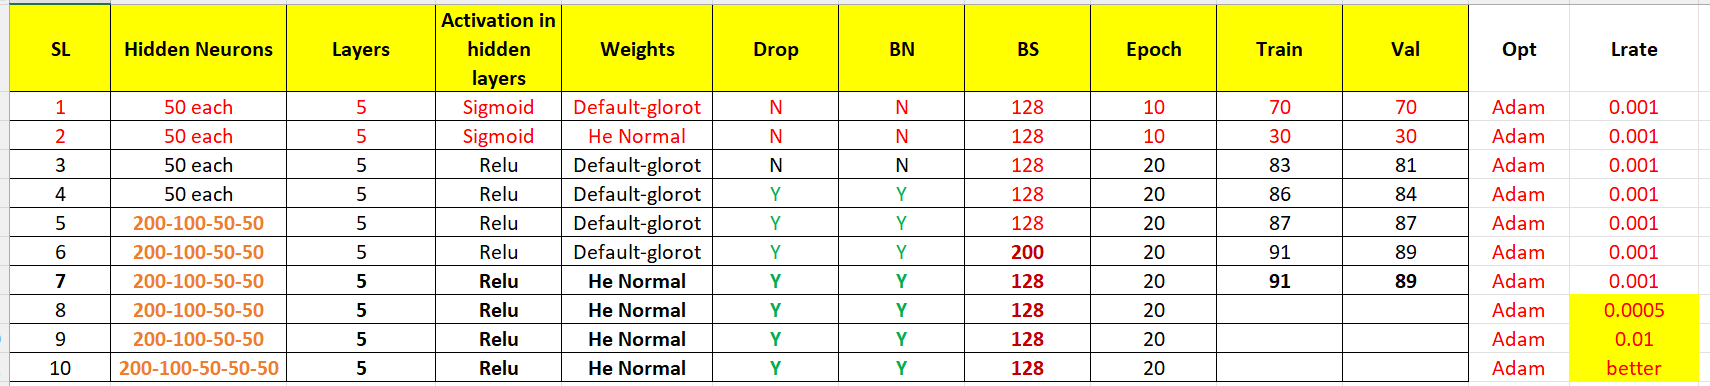

In [71]:
for pos, model in enumerate(all_adm_models):
    print('\nModel_ADM'+str(pos+1))
    model.summary()


Model_ADM1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)


Model_ADM2


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)


Model_ADM3


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)


Model_ADM4


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,801 (46.10 KB)

 Trainable params: 11,301 (44.14 KB)

 Non-trainable params: 500 (1.95 KB)


Model_ADM5


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_ADM6


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_ADM7


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_ADM8


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_ADM9


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_ADM10


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)

In [72]:
for pos, model in enumerate(all_sgd_models):
    print('\nModel_SGD'+str(pos+1))
    model.summary()


Model_SGD1


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)


Model_SGD2


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)


Model_SGD3


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)


Model_SGD4


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,801 (46.10 KB)

 Trainable params: 11,301 (44.14 KB)

 Non-trainable params: 500 (1.95 KB)


Model_SGD5


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_SGD6


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_SGD7


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_SGD8


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_SGD9


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)


Model_SGD10


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 200)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,301 (133.99 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 900 (3.52 KB)

### 9.4 Train the Model

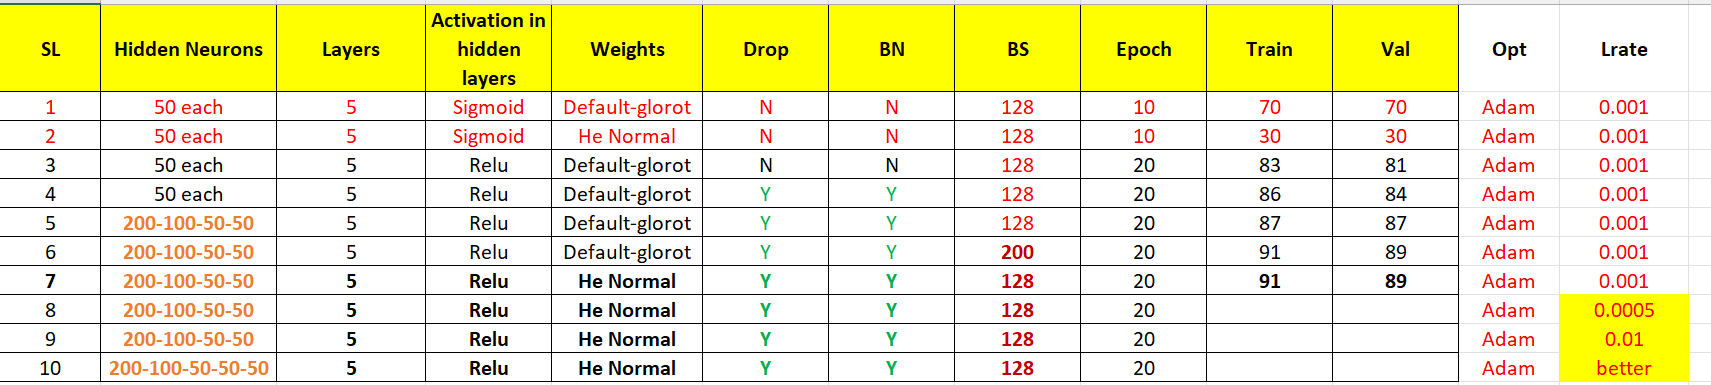

In [85]:
# Train each model with its respective Epoch and Batch Size

for pos, model in enumerate(all_adm_models):
    print('Model_ADM'+str(pos+1))
    if pos == 0:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=10,batch_size=128)
    elif pos == 1:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=10,batch_size=128)
    elif pos == 2:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 3:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 4:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 5:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=200)
    elif pos == 6:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 7:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 8:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 9:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)

Model_ADM1
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 758.9569 - mean_squared_error: 1176625.6250 - r2_score: 0.5918 - val_loss: 735.0422 - val_mean_squared_error: 1071510.0000 - val_r2_score: 0.6058
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 754.0210 - mean_squared_error: 1158488.3750 - r2_score: 0.6146 - val_loss: 713.4155 - val_mean_squared_error: 1068377.1250 - val_r2_score: 0.6069
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 766.6650 - mean_squared_error: 1225780.6250 - r2_score: 0.5873 - val_loss: 731.3443 - val_mean_squared_error: 1055275.7500 - val_r2_score: 0.6117
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 776.0526 - mean_squared_error: 1226647.8750 - r2_score: 0.5839 - val_loss: 715.2618 - val_mean_squared_error: 1035066.5625 - val_r2_score: 0.6192
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 752.3829 - mean_squared_error: 1194117.5000 - r2_score: 0.6077 - val_loss: 719.4665 - val_mean_squared_error: 10367

In [86]:
for pos, model in enumerate(all_sgd_models):
    print('Model_SGD'+str(pos+1))
    if pos == 0:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=10,batch_size=128)
    elif pos == 1:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=10,batch_size=128)
    elif pos == 2:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 3:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 4:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 5:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=200)
    elif pos == 6:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 7:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 8:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)
    elif pos == 9:
        model.fit(X_scaled_train,y_train.values, validation_data=(X_scaled_valid,y_valid),epochs=20,batch_size=128)

Model_SGD1
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 771.2899 - mean_squared_error: 1230349.8750 - r2_score: 0.5773 - val_loss: 717.1848 - val_mean_squared_error: 1042635.5000 - val_r2_score: 0.6164
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 773.8152 - mean_squared_error: 1239607.6250 - r2_score: 0.5867 - val_loss: 710.8363 - val_mean_squared_error: 1047361.8125 - val_r2_score: 0.6147
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 753.2814 - mean_squared_error: 1176966.7500 - r2_score: 0.6022 - val_loss: 713.9092 - val_mean_squared_error: 1044608.4375 - val_r2_score: 0.6157
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 769.3211 - mean_squared_error: 1221322.7500 - r2_score: 0.5860 - val_loss: 709.7570 - val_mean_squared_error: 1040417.3125 - val_r2_score: 0.6172
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 767.4853 - mean_squared_error: 1214994.5000 - r2_score: 0.5920 - val_loss: 724.0589 - val_mean_squared_error: 10558

### 9.5 'Evaluate' Models using Train and Valid Datasets

**Metrics: Train Dataset**

In [87]:
# Evaluate ADAM Models (Train Datasets)
models_train_adm=[];losses_train_adm=[];mses_train_adm=[];r2scores_train_adm=[]
for pos, model in enumerate(all_adm_models):
    print('\nModel_ADM'+str(pos+1))
    loss, r2_score, mse = model.evaluate(X_scaled_train, y_train)
    models_train_adm.append('Model_ADM'+str(pos+1)),losses_train_adm.append(loss), mses_train_adm.append(mse), r2scores_train_adm.append(r2_score)


Model_ADM1
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753.8271 - mean_squared_error: 1209509.1250 - r2_score: 0.5862

Model_ADM2
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 746.2702 - mean_squared_error: 1167905.3750 - r2_score: 0.6004

Model_ADM3
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 743.9886 - mean_squared_error: 1163801.1250 - r2_score: 0.6018

Model_ADM4
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 772.4989 - mean_squared_error: 1318164.2500 - r2_score: 0.5491

Model_ADM5
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 763.3066 - mean_squared_error: 1283513.1250 - r2_score: 0.5609

Model_ADM6
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1143.1427 - mean_squared_error: 2798910.7500 - r2_score: 0.0424

Model_ADM7
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 763.1536 - mean_squared_error: 1307938.6250 - r2_score: 0.5526

Model_ADM8
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1525.7076 - mean_squared_error: 4512255.0000 - r2_score: -0.5440

Mode

In [88]:
# Evaluate SGD Models (Train Datasets)
models_train_sgd=[];losses_train_sgd=[];mses_train_sgd=[];r2scores_train_sgd=[]
for pos, model in enumerate(all_sgd_models):
    print('\nModel_SGD'+str(pos+1))
    loss, r2_score, mse = model.evaluate(X_scaled_train, y_train)
    models_train_sgd.append('Model_SGD'+str(pos+1)),losses_train_sgd.append(loss), mses_train_sgd.append(mse), r2scores_train_sgd.append(r2_score)


Model_SGD1
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 747.8466 - mean_squared_error: 1177313.6250 - r2_score: 0.5972

Model_SGD2
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 748.8030 - mean_squared_error: 1188592.7500 - r2_score: 0.5933

Model_SGD3
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 746.3586 - mean_squared_error: 1165136.7500 - r2_score: 0.6013

Model_SGD4
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 789.6074 - mean_squared_error: 1395436.8750 - r2_score: 0.5227

Model_SGD5
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 758.5961 - mean_squared_error: 1256714.3750 - r2_score: 0.5701

Model_SGD6
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1116.6143 - mean_squared_error: 2724169.7500 - r2_score: 0.0680

Model_SGD7
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 756.8712 - mean_squared_error: 1258287.7500 - r2_score: 0.5696

Model_SGD8
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1516.9077 - mean_squared_error: 4486472.0000 - r2_score: -0.5352

Mode

**Metrics: Valid Dataset**

In [89]:
# Evaluate ADAM Models (Valid Datasets)

models_valid_adm=[];losses_valid_adm=[];mses_valid_adm=[];r2scores_valid_adm=[]
for pos, model in enumerate(all_adm_models):
    print('\nModel_ADM'+str(pos+1))
    loss, r2_score, mse = model.evaluate(X_scaled_valid, y_valid)
    models_valid_adm.append('Model_ADM'+str(pos+1)),losses_valid_adm.append(loss), mses_valid_adm.append(mse), r2scores_valid_adm.append(r2_score)


Model_ADM1
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 711.0341 - mean_squared_error: 1048958.2500 - r2_score: 0.6109

Model_ADM2
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 705.7838 - mean_squared_error: 1017731.0625 - r2_score: 0.6220

Model_ADM3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 709.2938 - mean_squared_error: 1022981.2500 - r2_score: 0.6197

Model_ADM4
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 729.7230 - mean_squared_error: 1157890.6250 - r2_score: 0.5710

Model_ADM5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 730.0137 - mean_squared_error: 1133206.5000 - r2_score: 0.5803

Model_ADM6
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1089.7142 - mean_squared_error: 2503510.7500 - r2_score: 0.0727

Model_ADM7
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 729.9788 - mean_squared_error: 1159950.0000 - r2_score: 0.5705

Model_ADM8
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1462.3341 - mean_squared_error: 4114905.0000 - r2_score: -0.5259

Model_ADM9
54/54 ━━━

In [90]:
# Evaluate SGD Models (Valid Datasets)

models_valid_sgd=[];losses_valid_sgd=[];mses_valid_sgd=[];r2scores_valid_sgd=[]
for pos, model in enumerate(all_sgd_models):
    print('\nModel_SGD'+str(pos+1))
    loss, r2_score, mse = model.evaluate(X_scaled_valid, y_valid)
    models_valid_sgd.append('Model_SGD'+str(pos+1)),losses_valid_sgd.append(loss), mses_valid_sgd.append(mse), r2scores_valid_sgd.append(r2_score)


Model_SGD1
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 708.3829 - mean_squared_error: 1023176.1250 - r2_score: 0.6201

Model_SGD2
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 710.6323 - mean_squared_error: 1033188.0000 - r2_score: 0.6162

Model_SGD3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 708.0782 - mean_squared_error: 1020413.6250 - r2_score: 0.6206

Model_SGD4
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 740.7735 - mean_squared_error: 1223892.5000 - r2_score: 0.5467

Model_SGD5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 717.6462 - mean_squared_error: 1099760.7500 - r2_score: 0.5923

Model_SGD6
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1066.4690 - mean_squared_error: 2442690.2500 - r2_score: 0.0953

Model_SGD7
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 725.4915 - mean_squared_error: 1121391.7500 - r2_score: 0.5845

Model_SGD8
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1454.2341 - mean_squared_error: 4089424.2500 - r2_score: -0.5164

Model_SGD9
54/54 ━━━

In [91]:
#-------------------------------------------------------------------------------------------------------------------------------------
# Create Dataframe from Train and Valid Metrics -ADAM Models
#-------------------------------------------------------------------------------------------------------------------------------------
train_scores_adm    = {'Models':models_train_adm,'Train_Mean_Abs_Err-ADM':losses_train_adm,'Train_Mean_Sqr_Err-ADM':mses_train_adm,\
                       'Train_R2_Score-ADM':r2scores_train_adm}
train_scores_adm_df = pd.DataFrame(train_scores_adm)
valid_scores_adm   = {'Valid_Mean_Abs_Err-ADM':losses_valid_adm,'Valid_Mean_Sqr_Err-ADM':mses_valid_adm,'Valid_R2_Score-ADM':r2scores_valid_adm}
valid_scores_adm_df = pd.DataFrame(valid_scores_adm)
#-------------------------------------------------------------------------------------------------------------------------------------
# Concatane both Dataframes for combined view
#-------------------------------------------------------------------------------------------------------------------------------------
total_scores_adm_df = pd.concat([train_scores_adm_df,valid_scores_adm_df],axis=1)
total_scores_adm_df.set_index(['Models'], inplace = True)
total_scores_adm_df.head(10)

,Train_Mean_Abs_Err-ADM,Train_Mean_Sqr_Err-ADM,Train_R2_Score-ADM,Valid_Mean_Abs_Err-ADM,Valid_Mean_Sqr_Err-ADM,Valid_R2_Score-ADM
Models,,,,,,
Model_ADM1,762.476013,1231329.000,0.583736,715.370667,1.074193e+06,0.604782
Model_ADM2,750.926025,1176760.875,0.602183,711.864868,1.041187e+06,0.616925
Model_ADM3,749.800659,1172870.750,0.603498,711.360535,1.039054e+06,0.617710
Model_ADM4,784.900330,1352247.250,0.542858,734.728394,1.177118e+06,0.566913
Model_ADM5,775.978210,1321027.250,0.553412,737.267456,1.166983e+06,0.570642
Model_ADM6,1171.941284,2901867.250,0.018992,1100.528564,2.551478e+06,0.061257
Model_ADM7,777.740845,1345717.875,0.545066,738.690552,1.192332e+06,0.561316
Model_ADM8,1557.981934,4650684.000,-0.572214,1471.204956,4.164735e+06,-0.532295
Model_ADM9,749.648376,1160539.375,0.607667,718.680847,1.051847e+06,0.613003


In [92]:
#-------------------------------------------------------------------------------------------------------------------------------------
# Create Dataframe from Train and Valid Metrics -SGD Models
#-------------------------------------------------------------------------------------------------------------------------------------
train_scores_sgd    = {'Models':models_train_sgd,'Train_Mean_Abs_Err-SGD':losses_train_sgd,'Train_Mean_Sqr_Err-SGD':mses_train_sgd,\
                       'Train_R2_Score-SGD':r2scores_train_sgd}
train_scores_sgd_df = pd.DataFrame(train_scores_sgd)
valid_scores_sgd   = {'Valid_Mean_Abs_Err-SGD':losses_valid_sgd,'Valid_Mean_Sqr_Err-SGD':mses_valid_sgd,'Valid_R2_Score-SGD':r2scores_valid_sgd}
valid_scores_sgd_df = pd.DataFrame(valid_scores_sgd)
#-------------------------------------------------------------------------------------------------------------------------------------
# Concatane both Dataframes for combined view
#-------------------------------------------------------------------------------------------------------------------------------------
total_scores_sgd_df = pd.concat([train_scores_sgd_df,valid_scores_sgd_df],axis=1)
total_scores_sgd_df.set_index(['Models'], inplace = True)
total_scores_sgd_df.head(10)

,Train_Mean_Abs_Err-SGD,Train_Mean_Sqr_Err-SGD,Train_R2_Score-SGD,Valid_Mean_Abs_Err-SGD,Valid_Mean_Sqr_Err-SGD,Valid_R2_Score-SGD
Models,,,,,,
Model_SGD1,753.452271,1188653.125,0.598163,712.840698,1048923.375,0.614079
Model_SGD2,754.742493,1198330.625,0.594891,710.701599,1048043.625,0.614402
Model_SGD3,750.081970,1171073.875,0.604106,713.586060,1039207.125,0.617653
Model_SGD4,803.043213,1433240.250,0.515478,747.753052,1249330.875,0.540344
Model_SGD5,768.192444,1280097.625,0.567249,726.755798,1127923.500,0.585013
Model_SGD6,1143.313843,2818158.250,0.047291,1076.553467,2480802.500,0.087260
Model_SGD7,767.617859,1284076.375,0.565904,731.880798,1148782.750,0.577338
Model_SGD8,1549.501221,4624748.500,-0.563446,1463.561523,4139779.750,-0.523113
Model_SGD9,757.768066,1216951.000,0.588597,718.614807,1082702.875,0.601650


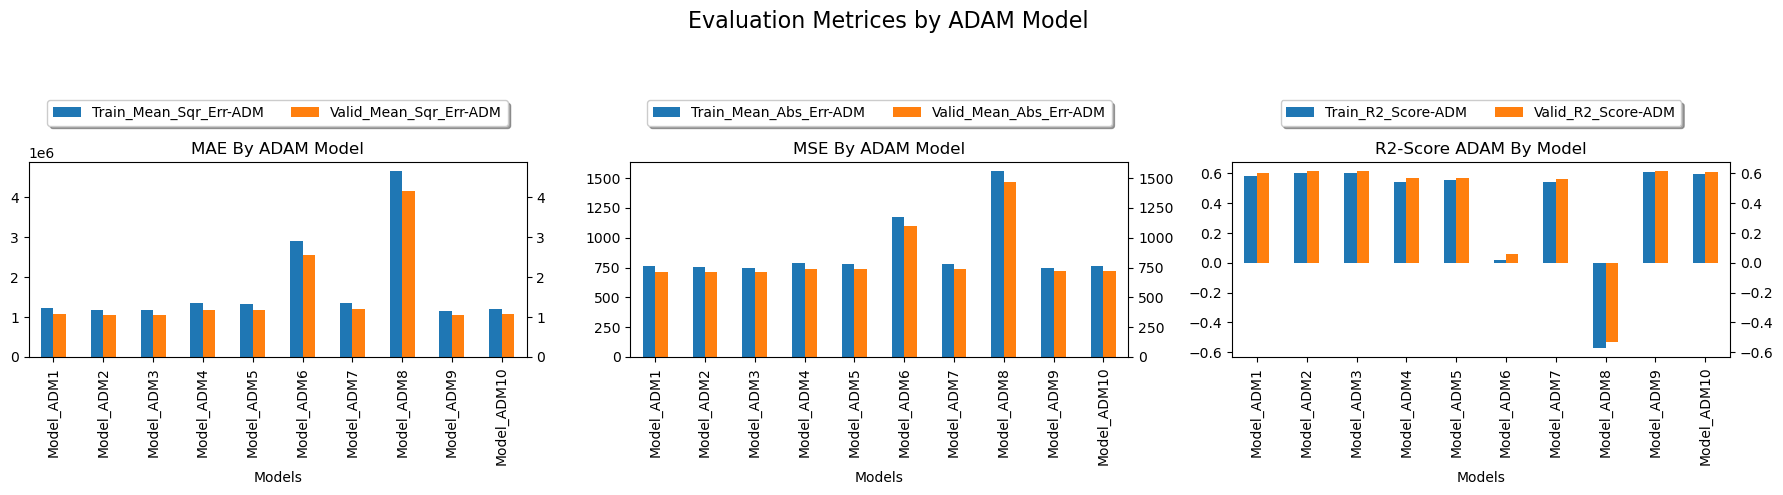

In [93]:
# Plot the ADAM Metrics

fig,ax = plt.subplots(figsize=(18,5), nrows=1,ncols=3)
#----------------------------------------------------------------------------------------------------
plt.suptitle("Evaluation Metrices by ADAM Model", fontsize=16)
#----------------------------------------------------------------------------------------------------
total_scores_adm_df.plot(y=['Train_Mean_Sqr_Err-ADM','Valid_Mean_Sqr_Err-ADM'],kind='bar',ax=ax[0],use_index=True);
ax[0].set_title('MAE By ADAM Model')
ax[0].tick_params(labelbottom=True, labelright=True,bottom=True,right=True)
ax[0].legend(loc='center', bbox_to_anchor=(0.5, 1.25),ncols=2,fancybox=True, shadow=True)
#----------------------------------------------------------------------------------------------------
total_scores_adm_df.plot(y=['Train_Mean_Abs_Err-ADM','Valid_Mean_Abs_Err-ADM'],kind='bar',ax=ax[1],use_index=True);
ax[1].tick_params(labelbottom=True, labelright=True,bottom=True,right=True)
ax[1].set_title('MSE By ADAM Model')
ax[1].legend(loc='center', bbox_to_anchor=(0.5, 1.25),ncols=2,fancybox=True, shadow=True)
#----------------------------------------------------------------------------------------------------
total_scores_adm_df.plot(y=['Train_R2_Score-ADM','Valid_R2_Score-ADM'],kind='bar',ax=ax[2],use_index=True);
ax[2].tick_params(labelbottom=True, labelright=True,bottom=True,right=True)
ax[2].set_title('R2-Score ADAM By Model')
ax[2].legend(loc='center', bbox_to_anchor=(0.5, 1.25),ncols=2,fancybox=True, shadow=True)
#----------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()

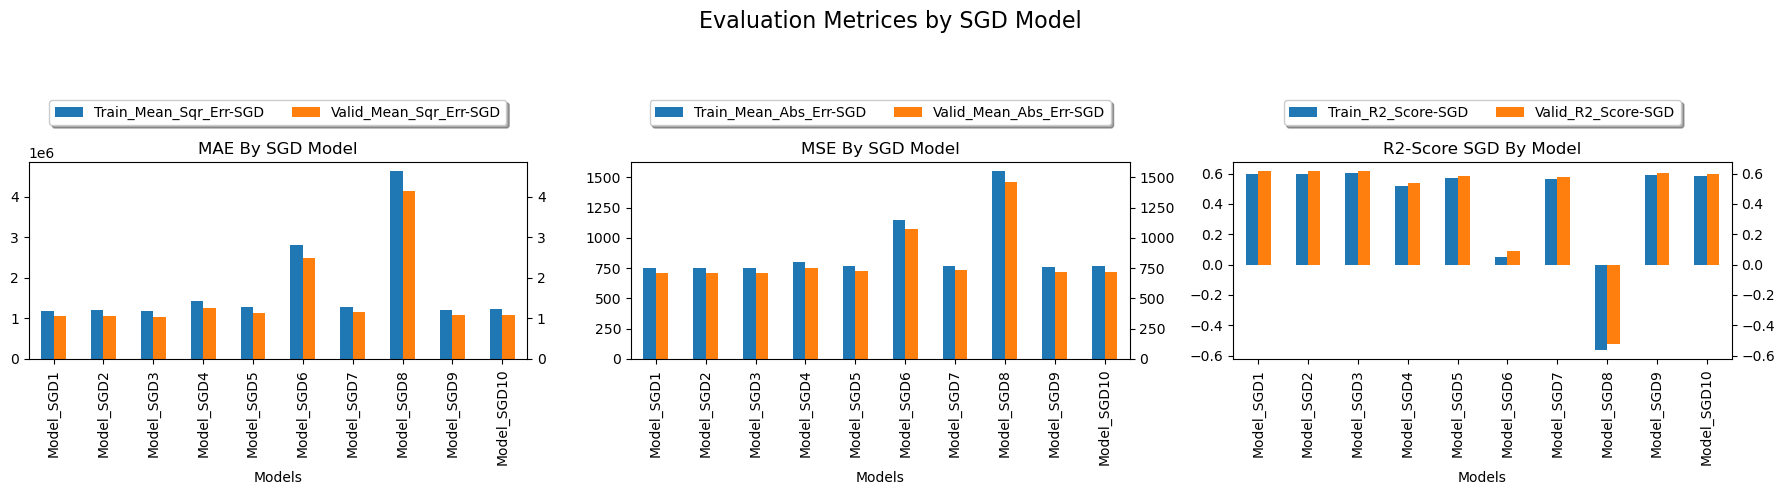

In [94]:
# Plot the SGD Metrics

fig,ax = plt.subplots(figsize=(18,5), nrows=1,ncols=3)
#----------------------------------------------------------------------------------------------------
plt.suptitle("Evaluation Metrices by SGD Model", fontsize=16)
#----------------------------------------------------------------------------------------------------
total_scores_sgd_df.plot(y=['Train_Mean_Sqr_Err-SGD','Valid_Mean_Sqr_Err-SGD'],kind='bar',ax=ax[0],use_index=True);
ax[0].set_title('MAE By SGD Model')
ax[0].tick_params(labelbottom=True, labelright=True,bottom=True,right=True)
ax[0].legend(loc='center', bbox_to_anchor=(0.5, 1.25),ncols=2,fancybox=True, shadow=True)
#----------------------------------------------------------------------------------------------------
total_scores_sgd_df.plot(y=['Train_Mean_Abs_Err-SGD','Valid_Mean_Abs_Err-SGD'],kind='bar',ax=ax[1],use_index=True);
ax[1].tick_params(labelbottom=True, labelright=True,bottom=True,right=True)
ax[1].set_title('MSE By SGD Model')
ax[1].legend(loc='center', bbox_to_anchor=(0.5, 1.25),ncols=2,fancybox=True, shadow=True)
#----------------------------------------------------------------------------------------------------
total_scores_sgd_df.plot(y=['Train_R2_Score-SGD','Valid_R2_Score-SGD'],kind='bar',ax=ax[2],use_index=True);
ax[2].tick_params(labelbottom=True, labelright=True,bottom=True,right=True)
ax[2].set_title('R2-Score SGD By Model')
ax[2].legend(loc='center', bbox_to_anchor=(0.5, 1.25),ncols=2,fancybox=True, shadow=True)
#----------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()

In [95]:
# Save the 'Total Score' Ddataframe to Excel

total_scores_adm_df.to_excel('total_scores_adm_df.xlsx',index=False)
total_scores_sgd_df.to_excel('total_scores_sgd_df.xlsx',index=False)

# Assuming you have a trained model named 'model'
# model = bm_sls_seq_model

# # Save the model to a pickle file
# filename = 'bm_sls_seq_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)

### 9.6 Visualize Model Performance (Train and Valid Datasets)

In [ ]:
# summarize history for loss

# plt.plot(model_history_seq.history['loss'])
# plt.plot(model_history_seq.history['val_loss'])

# plt.title('Model Loss')
# plt.ylabel('MAE')
# plt.xlabel('Epoch')

# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.legend(['Train', 'Validation'], loc='upper right')

# plt.show()

In [ ]:
# summarize history for loss

plt.plot(model_history_seq.history['r2_score'])
plt.plot(model_history_seq.history['val_r2_score'])

plt.title('Model Score')
plt.ylabel('R2-Square')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='lower right')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

### 9.7 Plot the Distribution

In [ ]:
y_valid_predict = bm_sls_seq_model.predict(X_scaled_valid)

plt.figure(figsize=(5,3))
plt.scatter(y_valid, y_valid_predict)
p1 = max(max(y_valid_predict), max(y_valid))
p2 = min(min(y_valid_predict), min(y_valid))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')

### 9.8 Predict and Save Test Dataset

In [ ]:
#Manually predicting from the model, instead of using model's evaluate function

y_test = pd.DataFrame(bm_sls_seq_model.predict(X_scaled_test))
y_test.columns = ['Item_Outlet_Sales']
print(y_test.head(10))

In [ ]:
y_test.info()

In [ ]:
bm_sales_pred.info()

In [ ]:
bm_sales_prediction = pd.concat([bm_sales_pred,y_test],axis=1)
bm_sales_prediction.head()

In [ ]:
bm_sales_prediction.to_csv('bm_sales_prediction.csv',index=False)

## 10. Build Keras Functional Neural Network Model<a id='10'></a> 

### 10.1 Define Input, Output Neurons

In [ ]:
# Define Input Neurons
input_features_fn = X_scaled_train.shape[1]
input_neurons_fn  = input_features_fn
#--------------------------------------------------
# Define Hidden layers and Neuron for each layer
#--------------------------------------------------
number_of_hidden_layers_fn = 2
neuron_hidden_layer_1_1_fn = 500
neuron_hidden_layer_1_2_fn = 500
neuron_hidden_layer_1_3_fn = 500
neuron_hidden_layer_1_4_fn = 500
neuron_hidden_layer_2_fn   = 500
#--------------------------------------------------
output_neurons_fn    = 1

### 10.2 Define the Architecture Using Functional API

In [ ]:
from keras import Input, Model
from keras.layers import InputLayer, Dense, concatenate 
from keras.optimizers import RMSprop

#---------------------------------------------------------------------------------
input_x = Input(shape = (input_neurons_fn,))
#---------------------------------------------------------------------------------
hidden1_1_fn = Dense(units=neuron_hidden_layer_1_1_fn, activation='relu')(input_x)
hidden1_2_fn = Dense(units=neuron_hidden_layer_1_2_fn, activation='relu')(input_x)
hidden1_3_fn = Dense(units=neuron_hidden_layer_1_3_fn, activation='relu')(input_x)
hidden1_4_fn = Dense(units=neuron_hidden_layer_1_4_fn, activation='relu')(input_x)
#---------------------------------------------------------------------------------
combined     = concatenate([hidden1_1_fn, hidden1_2_fn,hidden1_3_fn,hidden1_4_fn])
#---------------------------------------------------------------------------------
hidden2_fn   = Dense(units=neuron_hidden_layer_2_fn, activation='relu')(combined)
output_fn    = Dense(units=output_neurons_fn, activation='linear')(hidden2_fn)
#---------------------------------------------------------------------------------
bm_sls_fn_model = Model(input_x, output_fn) 

In [ ]:
# summary of the model
bm_sls_fn_model.summary()

### 10.3 Compile and Train the Model (Loss Function and Optimizer)

- Loss as 'mean_absolute_error'
- Define the Optimizer as 'RMSprop'
- Evluate metric as 'r2-score', 'mean-squared-error'

In [ ]:
optimizer = RMSprop(0.1)    # 0.1 is the learning rate
#------------------------------------------------------------------------------------------------------
bm_sls_fn_model.compile(loss='mean_absolute_error',optimizer=optimizer,metrics=['r2_score','mean_squared_error'])
#------------------------------------------------------------------------------------------------------
# fit the model 
model_history_fn = bm_sls_fn_model.fit(X_scaled_train,y_train, validation_data=(X_scaled_valid,y_valid),epochs=25,batch_size=128)

### 10.4 'Evaluate' Train and Valid Datasets

In [ ]:
# Evaluate the model (Train Dataset)

loss, mse, r2_score = bm_sls_fn_model.evaluate(X_scaled_train, y_train)

In [ ]:
# Evaluate the model (Valid Dataset)

loss, mse, r2_score = bm_sls_fn_model.evaluate(X_scaled_valid, y_valid)

### 10.5 Visualize Model Performance (Train and Valid Datasets)

In [ ]:
# summarize history for loss

plt.plot(model_history_fn.history['loss'])
plt.plot(model_history_fn.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper right')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
# summarize history for Score

plt.plot(model_history_fn.history['r2_score'])
plt.plot(model_history_fn.history['val_r2_score'])

plt.title('Model Loss')
plt.ylabel('R2-Score')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='lower right')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

### 10.6 Plot the Distribution

In [ ]:
y_valid_predict_fn = bm_sls_fn_model.predict(X_scaled_valid)

plt.figure(figsize=(5,3))
plt.scatter(y_valid, y_valid_predict_fn)
p1 = max(max(y_valid_predict_fn.flatten()), max(y_valid))
p2 = min(min(y_valid_predict_fn.flatten()), min(y_valid))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')

### 10.7 Predict and Save Test Dataset

In [ ]:
#Manually predicting from the model, instead of using model's evaluate function

y_fn_test = pd.DataFrame(bm_sls_fn_model.predict(X_scaled_test))
y_fn_test.columns = ['Item_Outlet_Sales']
print(y_test.head(10))

In [ ]:
y_fn_test.info()

In [ ]:
bm_sales_pred.info()

In [ ]:
bm_sales_prediction_fn = pd.concat([bm_sales_pred,y_fn_test],axis=1)
bm_sales_prediction_fn.head()

In [ ]:
bm_sales_prediction_fn.to_csv('bm_sales_prediction_fn.csv',index=False)

## 11. Build Keras Functional Neural Network Using 'KerasTuner'<a id='11'></a> 
The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning.

Hyperparameters are the variables that govern the training process and the topology of an ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

Model hyperparameters which influence model selection such as the number and width of hidden layers
Algorithm hyperparameters which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier

**Introduction to the Keras Tuner**
https://www.tensorflow.org/tutorials/keras/keras_tuner

In [ ]:
# !pip install -q -U keras-tuner

### 11.1 Define the Architecture Using Functional API

In [ ]:
from keras import Input, Model, layers
from keras.layers import InputLayer, Dense, concatenate
from keras.optimizers import RMSprop

# Import RandomSearch tuner from KerasTuner
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):

    #----------------------------------------------------------------------------------
    model = keras.Sequential()
    #----------------------------------------------------------------------------------
    # Define Input Layer
    #----------------------------------------------------------------------------------
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),activation='relu',input_shape=(X_scaled_train.shape[1],)))
    #----------------------------------------------------------------------------------
    # Add Hidden layers
    #----------------------------------------------------------------------------------
    # for i in range(hp.Int('num_layers', 2, 6)):
    #     model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),activation='relu'))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units,activation='relu'));model.add(Dense(units=hp_units,activation='relu'))
    model.add(Dense(units=hp_units,activation='relu'));model.add(Dense(units=hp_units,activation='relu'))
    #----------------------------------------------------------------------------------
    # Output layer for regression
    #----------------------------------------------------------------------------------
    model.add(Dense(1))  
    #----------------------------------------------------------------------------------
    # Tune the learning rate
    #----------------------------------------------------------------------------------
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    #----------------------------------------------------------------------------------
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),loss='mean_absolute_error',metrics=['r2_score','mean_absolute_error'])

    return model


### 11.2 Instantiate 'RamdsonSearch' Tuner Object 

In [ ]:
# Instantiate the tuner object

tuner = RandomSearch(
    build_model, 
    objective=('val_loss'),  # Minimize mean squared error on validation set
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=3  # Run each combination multiple times for stability
    # directory='tuning_results'  # Directory to store tuning results
)

In [ ]:
tuner.search_space_summary()

### 11.3 Train the Model Using Hyperparameter Tuning Search

In [ ]:
# Start the hyperparameter tuning process

tuner.search(X_scaled_train, y_train, validation_data=(X_scaled_valid, y_valid), epochs=25) 

### 11.4 Get the 'Best Hyperparameters'

In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

### 11.5 Build BestModel Using 'Hypermodel'

In [ ]:
# Build the final model with the best hyperparameters

best_model   = tuner.hypermodel.build(best_hp)
best_history = best_model.fit(X_scaled_train, y_train, epochs=50, validation_split=0.2)

In [ ]:
# summary of the model
best_model.summary()

In [ ]:
val_acc_per_epoch = best_history.history['val_loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

**Re-instantiate the hypermodel and train it with the optimal number of epochs from above.**

In [ ]:
hypermodel = tuner.hypermodel.build(best_hp)

# Retrain the model
hyper_model_hist = hypermodel.fit(X_scaled_train, y_train, epochs=best_epoch, validation_split=0.2)

### 11.6 'Evaluate' Train and Valid Datasets

In [ ]:
# Evaluate the model (Train Dataset)

loss, r2_score, mse = hypermodel.evaluate(X_scaled_train, y_train)

In [ ]:
# Evaluate the model (Valid Dataset)

loss, r2_score, mse = hypermodel.evaluate(X_scaled_valid, y_valid)

### 11.7 Visualize Model Performance (Train and Valid Datasets)

In [ ]:
# summarize history for loss

plt.plot(best_history.history['mean_absolute_error'])
plt.plot(best_history.history['val_mean_absolute_error'])

plt.title('Model Loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper right')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
# summarize history for Score

plt.plot(best_history.history['r2_score'])
plt.plot(best_history.history['val_r2_score'])

plt.title('Model Loss')
plt.ylabel('R2-Score')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='lower right')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

### 11.8 Plot the Distribution

In [ ]:
y_valid_predict_rs = hypermodel.predict(X_scaled_valid)

plt.figure(figsize=(5,3))
plt.scatter(y_valid, y_valid_predict_rs)
p1 = max(max(y_valid_predict_rs), max(y_valid))
p2 = min(min(y_valid_predict_rs), min(y_valid))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')

### 11.9 Predict and Save Test Dataset

In [ ]:
# Manually predicting from the model, instead of using model's evaluate function

y_best_test = pd.DataFrame(hypermodel.predict(X_scaled_test))
y_best_test.columns = ['Item_Outlet_Sales']
print(y_test.head(10))

In [ ]:
y_best_test.info()

In [ ]:
bm_sales_pred.info()

In [ ]:
bm_sales_prediction_best = pd.concat([bm_sales_pred,y_best_test],axis=1)
bm_sales_prediction_best.head()

In [ ]:
bm_sales_prediction_best.to_csv('bm_sales_prediction_best.csv',index=False)